In [ ]:
from google.colab import files


uploaded = files.upload()


Saving bank.csv to bank.csv


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))
print(df)



       age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \

In [ ]:
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


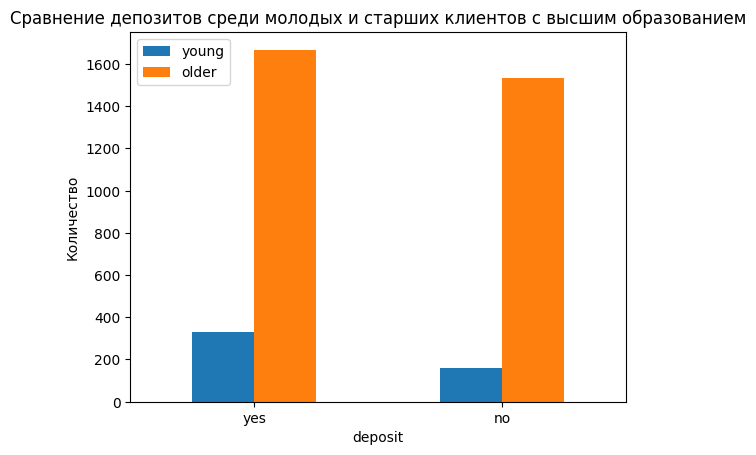

In [ ]:
### Гипотеза 1: Более молодые клиенты с высшим образованием более склонны к открытию депозитов.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('bank.csv')

# Фильтрация данных по возрасту и образованию
young_clients = data[(data['age'] < 30) & (data['education'] == 'tertiary')]
older_clients = data[(data['age'] >= 30) & (data['education'] == 'tertiary')]

# Подсчет количества депозитов
young_deposit_count = young_clients['deposit'].value_counts()
older_deposit_count = older_clients['deposit'].value_counts()

# Визуализация
df_counts = pd.DataFrame({
    'young': young_deposit_count,
    'older': older_deposit_count
}).fillna(0)

df_counts.plot(kind='bar')
plt.title('Сравнение депозитов среди молодых и старших клиентов с высшим образованием')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

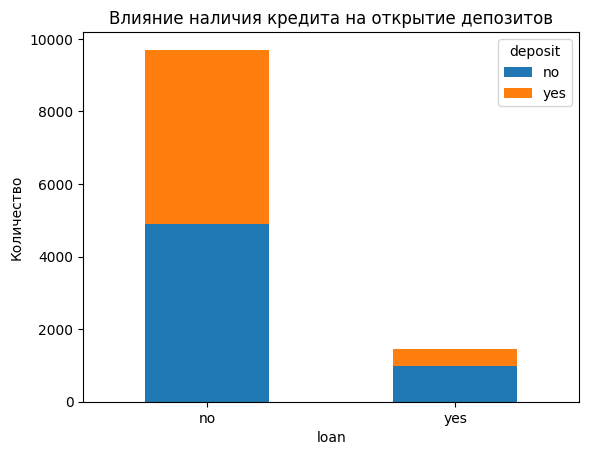

In [ ]:
### Гипотеза 2: Клиенты, имеющие кредит, менее склонны открывать депозиты.

# Подсчет количества депозитов по наличию кредита
loan_deposit_count = data.groupby('loan')['deposit'].value_counts().unstack()

# Визуализация
loan_deposit_count.plot(kind='bar', stacked=True)
plt.title('Влияние наличия кредита на открытие депозитов')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.show()

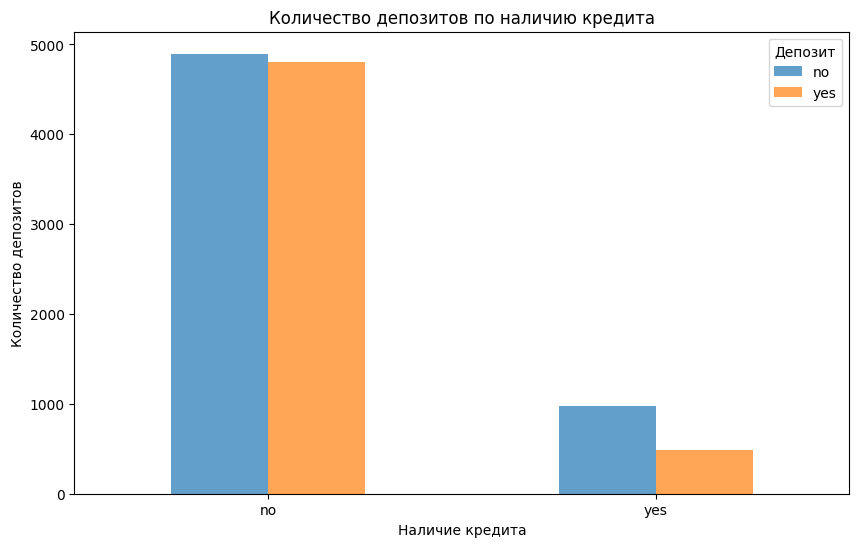

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчет количества депозитов по наличию кредита
loan_deposit_count = data.groupby(['loan', 'deposit']).size().unstack(fill_value=0)

# Визуализация
loan_deposit_count.plot(kind='bar', figsize=(10, 6), alpha=0.7)
plt.title('Количество депозитов по наличию кредита')
plt.xlabel('Наличие кредита')
plt.ylabel('Количество депозитов')
plt.xticks(rotation=0)
plt.legend(title='Депозит', loc='upper right')
plt.show()


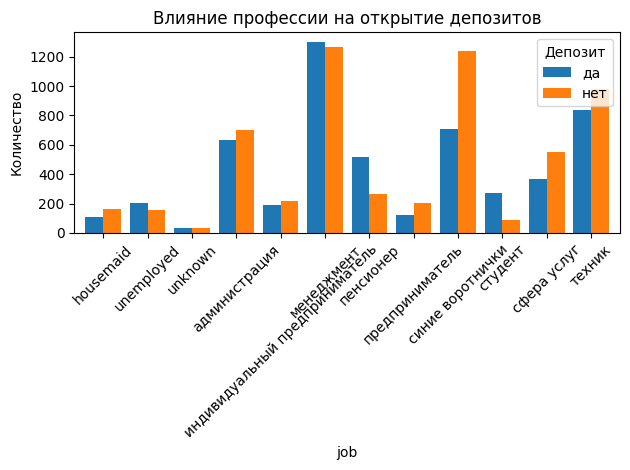

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Пример замены значений на русский язык
# Создание словаря для замены профессий
job_translation = {
    'blue-collar': 'синие воротнички',
    'white-collar': 'белые воротнички',
    'student': 'студент',
    'retired': 'пенсионер',
    'self-employed': 'индивидуальный предприниматель',
    'technician': 'техник',
    'services': 'сфера услуг',
    'management': 'менеджмент',
    'entrepreneur': 'предприниматель',
    'admin.': 'администрация'
}

# Создание словаря для замены значений депозитов
deposit_translation = {
    'yes': 'да',
    'no': 'нет'
}

# Замена значений в столбцах 'job' и 'deposit'
data['job'] = data['job'].replace(job_translation)
data['deposit'] = data['deposit'].replace(deposit_translation)

# Подсчет количества депозитов по профессии
job_deposit_count = data.groupby(['job', 'deposit']).size().unstack(fill_value=0)

# Визуализация
job_deposit_count.plot(kind='bar', width=0.8)
plt.title('Влияние профессии на открытие депозитов')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Депозит', loc='upper right')
plt.tight_layout()  # Чтобы избежать обрезки текста
plt.show()


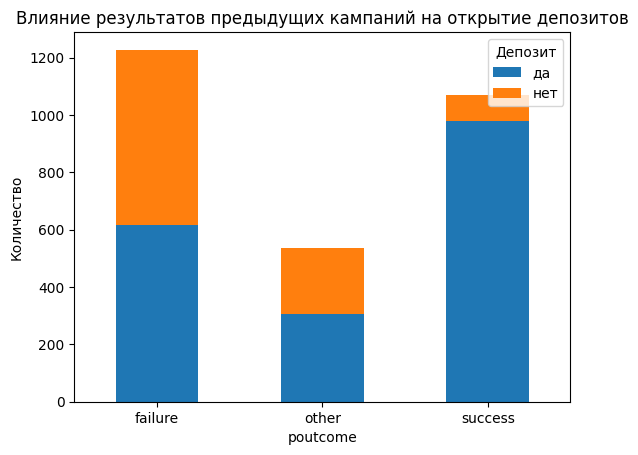

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Подсчет количества депозитов по результатам предыдущих кампаний
poutcome_deposit_count = data.groupby('poutcome')['deposit'].value_counts().unstack()

# Исключение строки с "unknown"
poutcome_deposit_count = poutcome_deposit_count.drop('unknown', axis=0, errors='ignore')

# Визуализация
poutcome_deposit_count.plot(kind='bar', stacked=True)
plt.title('Влияние результатов предыдущих кампаний на открытие депозитов')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.legend(title='Депозит', loc='upper right')
plt.show()


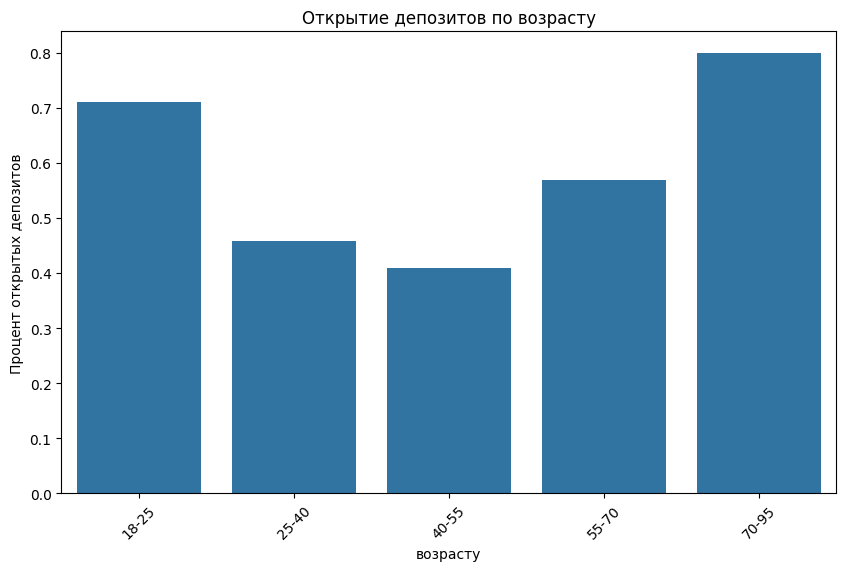

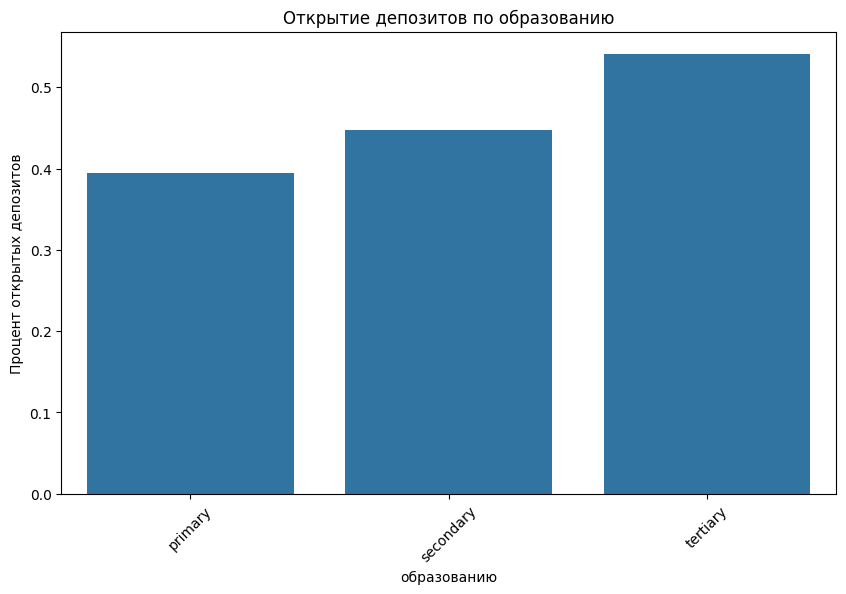

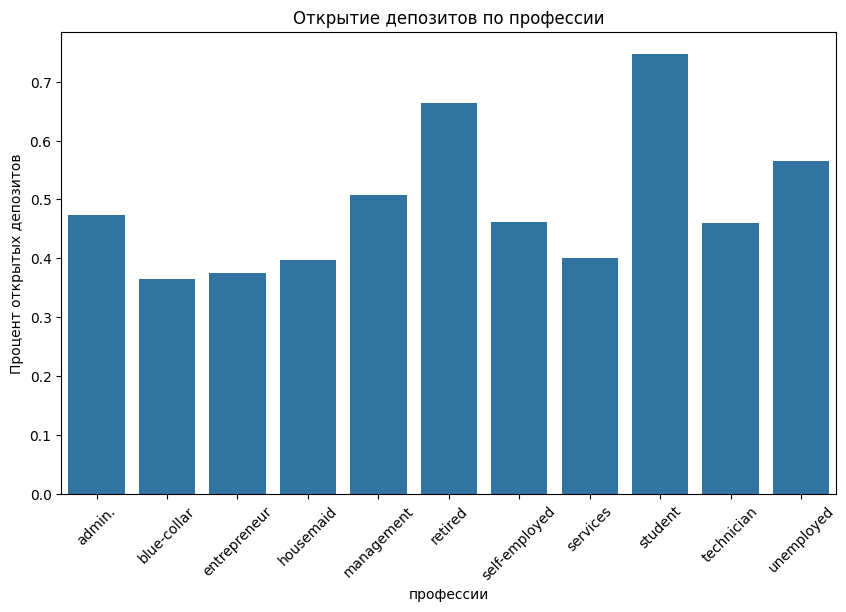

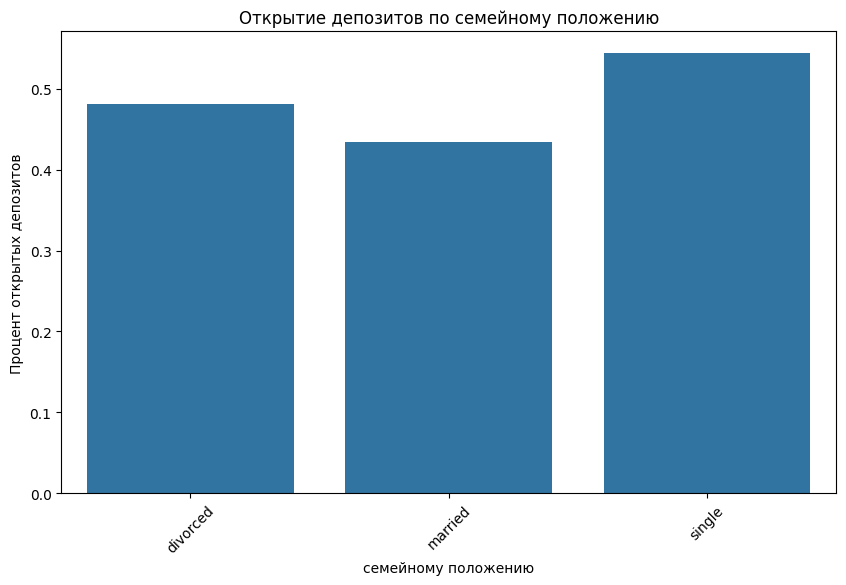

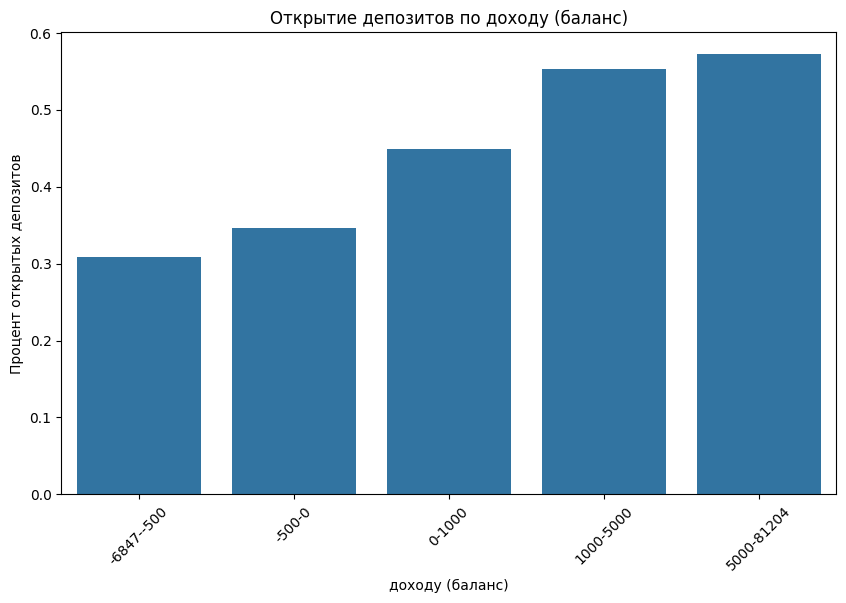

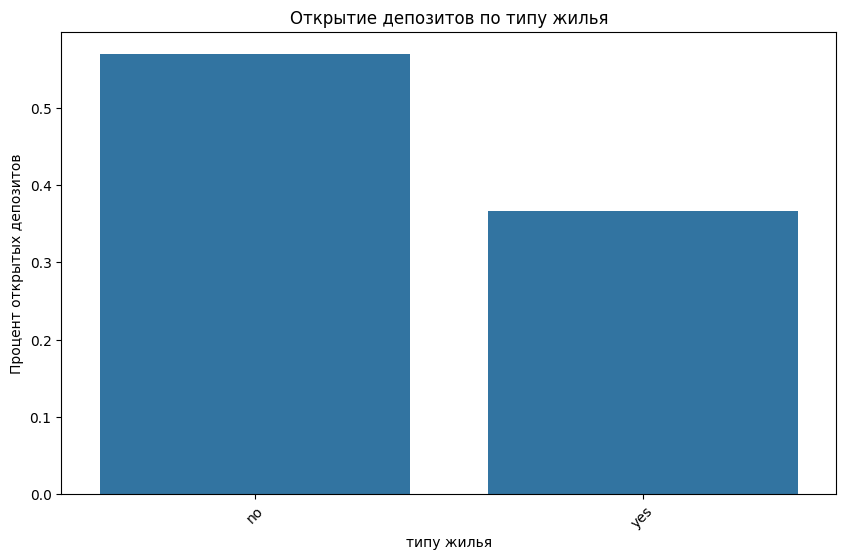

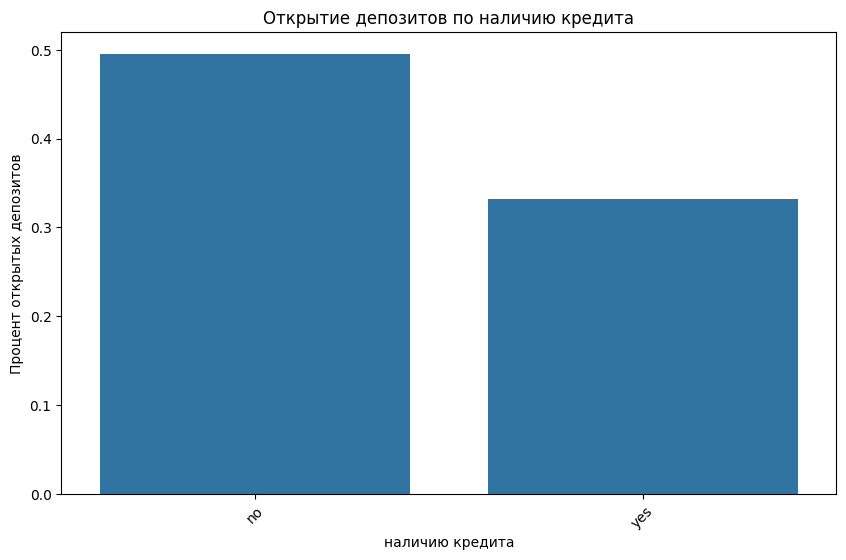

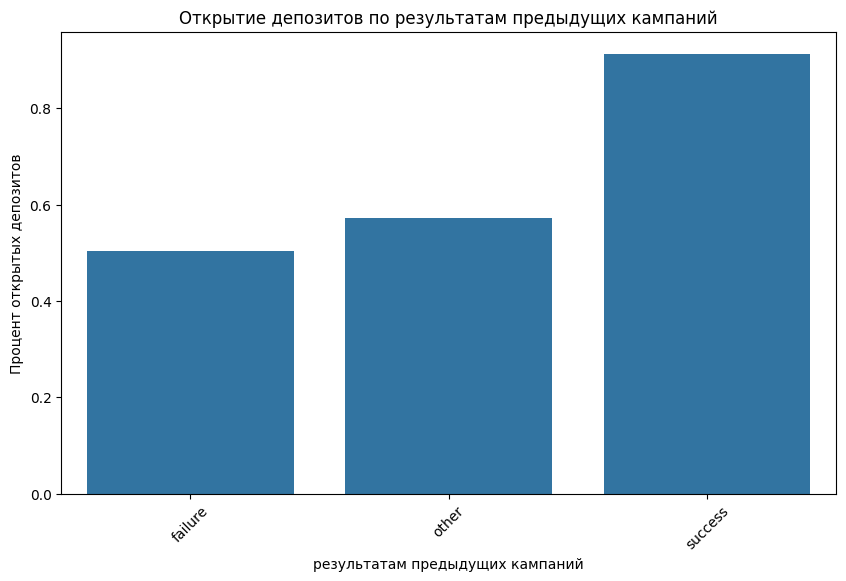


возраст:
  age_bins  процент_депозитов
0    18-25           0.711111
1    25-40           0.459008
2    40-55           0.409417
3    55-70           0.568126
4    70-95           0.798535

образование:
   education  процент_депозитов
0    primary           0.394000
1  secondary           0.447407
2   tertiary           0.541068

профессия:
              job  процент_депозитов
0          admin.           0.473013
1     blue-collar           0.364198
2    entrepreneur           0.375000
3       housemaid           0.397810
4      management           0.507015
5         retired           0.663239
6   self-employed           0.461728
7        services           0.399783
8         student           0.747222
9      technician           0.460779
10     unemployed           0.565826

семейное положение:
    marital  процент_депозитов
0  divorced           0.481052
1   married           0.433790
2    single           0.543491

доход:
  balance_bins  процент_депозитов
0   -6847--500           

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Шаг 1: Загрузка данных
data = pd.read_csv('bank.csv')  # Замените на путь к вашему файлу

# Преобразуем целевую переменную 'deposit' в числовой формат
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})

# Создаем корзины для возраста и дохода с указанием диапазонов
age_bins = [data['age'].min(), 25, 40, 55, 70, data['age'].max()]
age_labels = [f'{age_bins[i]}-{age_bins[i+1]}' for i in range(len(age_bins)-1)]
data['age_bins'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

balance_bins = [data['balance'].min(), -500, 0, 1000, 5000, data['balance'].max()]
balance_labels = [f'{balance_bins[i]}-{balance_bins[i+1]}' for i in range(len(balance_bins)-1)]
data['balance_bins'] = pd.cut(data['balance'], bins=balance_bins, labels=balance_labels, include_lowest=True)

# Функция для анализа гипотез
def analyze_hypothesis(group_by_column, title):
    plt.figure(figsize=(10, 6))

    # Фильтруем данные, исключая "unknown"
    filtered_data = data[data[group_by_column] != 'unknown']

    deposit_rates = filtered_data.groupby(group_by_column)['deposit'].mean().reset_index()
    deposit_rates.columns = [group_by_column, 'процент_депозитов']

    sns.barplot(x=group_by_column, y='процент_депозитов', data=deposit_rates)
    plt.title(f'Открытие депозитов по {title}')
    plt.ylabel('Процент открытых депозитов')
    plt.xlabel(title)
    plt.xticks(rotation=45)
    plt.show()
    return deposit_rates

# Шаг 2: Анализ каждой гипотезы
age_analysis = analyze_hypothesis('age_bins', 'возрасту')
education_analysis = analyze_hypothesis('education', 'образованию')
job_analysis = analyze_hypothesis('job', 'профессии')
marital_analysis = analyze_hypothesis('marital', 'семейному положению')
balance_analysis = analyze_hypothesis('balance_bins', 'доходу (баланс)')
housing_analysis = analyze_hypothesis('housing', 'типу жилья')
loan_analysis = analyze_hypothesis('loan', 'наличию кредита')
poutcome_analysis = analyze_hypothesis('poutcome', 'результатам предыдущих кампаний')

# Шаг 3: Сравнение результатов
results = {
    'возраст': age_analysis,
    'образование': education_analysis,
    'профессия': job_analysis,
    'семейное положение': marital_analysis,
    'доход': balance_analysis,
    'тип жилья': housing_analysis,
    'наличие кредита': loan_analysis,
    'результаты': poutcome_analysis,
}

# Выводим результаты для сравнения
for key, value in results.items():
    print(f'\n{key}:\n{value}')

# Определяем категорию с наивысшим процентом открытых депозитов
best_hypothesis = {k: v['процент_депозитов'].max() for k, v in results.items()}
best_group = max(best_hypothesis, key=best_hypothesis.get)
print(f'\nНаиболее предрасположенная группа для открытия депозитов: {best_group} с процентом {best_hypothesis[best_group]:.2f}')

### Выводы  (Примечание: выводы основаны исключительно на предоставленных данных, достоверность которых не проверялась).
Наиболее подходящая целевая аудитория по всем критериям:
- **Возраст**: 70-95 лет
- **Образование**: высшее
- **Профессия**: пенсионеры и студенты
- **Семейное положение**: одинокие
- **Доход**: 5000-81204
- **Тип жилья**: нет жилья
- **Наличие кредита**: без кредита
- **Результаты**: успешный исход (success)